In [1]:
from matplotlib import pyplot as plt
from numpy import average, sqrt, array  # noqa
from numpy.linalg import norm

from monte_carlo import monte_carlo

count = 100
N = 100000
rho = 0.1
temp = 1.0
size = sqrt(count/rho)
sim = monte_carlo(maxstep=N, temp=temp, count=count,
                  size=size, mode='periodic', dimension=2, rand=True)
c = array([0.5*size]*2)


In [2]:
import numpy as np
particles = array(
                  [i for i in sim.phy_sys.particles] +
                  [i+array([size, 0]) for i in sim.phy_sys.particles] +
                  [i+array([-size, 0]) for i in sim.phy_sys.particles] +
                  [i+array([0, size]) for i in sim.phy_sys.particles] +
                  [i+array([0, -size]) for i in sim.phy_sys.particles] +
                  [i+array([size, -size]) for i in sim.phy_sys.particles]+ 
                  [i+array([size, size]) for i in sim.phy_sys.particles]+ 
                  [i+array([-size, -size]) for i in sim.phy_sys.particles]+ 
                  [i+array([-size, -size]) for i in sim.phy_sys.particles]
                  )

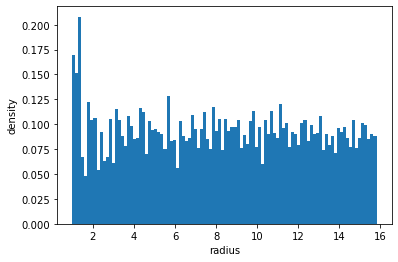

In [3]:
r = np.array([])
for i in range(100):
    c = sim.phy_sys.particles[i]
    r1 = norm(particles - c, axis = 1)
    r1 = r1[(r1<=(size/2))*(r1!=0)]
    r = np.append(r, r1)
plt.xlabel('radius')
plt.ylabel('density')
bins=100
plt.hist(r, bins=bins, weights=1/(2*np.pi*r)/(size/2)*bins/100)
plt.savefig('fig/exp2_rdf_peri_1.eps')

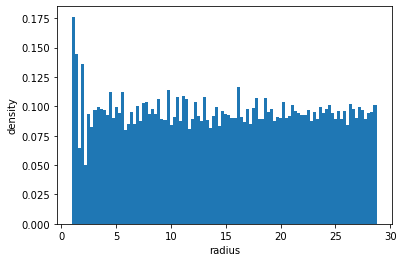

In [10]:
r = np.array([])
for i in range(100):
    c = sim.phy_sys.particles[i]
    r1 = norm(particles - c, axis = 1)
    r1 = r1[(r1<=(size/1.1))*(r1!=0)]
    r = np.append(r, r1)
plt.xlabel('radius')
plt.ylabel('density')
bins=100
a, b, c = plt.hist(r, bins=bins, weights=1/(2*np.pi*r)/(size/1.1)*bins/100)

In [13]:
g = np.zeros_like(a)
for i in range(a.size):
    g[i] = (b[i] + b[i+1])/2
from lennard_jones_potential.lennard_jones import lennard_jones
np.sum(lennard_jones(g, r_c = 100)*a)

-0.2621230260791033

In [8]:
sim.phy_sys.get_potential_energy()

-27.763825919937823